##### We probably don't need all of these imports but I included them anyway

In [45]:
# Imports
import pandas as pd  
import numpy as np
from pathlib import Path
import seaborn as sns
#import alpaca_trade_api as tradeapi


import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from dotenv import load_dotenv
import yfinance as yf
import quandl
import plotly.express as px
import plotly.graph_objects as go

# Individual and Institutional Confidence Indicators 

Import appropriate data

In [46]:
# Import confidence Data 
confidence_path = Path("data/one_year_confidence.csv")
confidence = pd.read_csv(confidence_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()

# Import monthly Dow Data 
dow_pct_change_path = Path("data/Dow Pct Change.csv")
dow_pct_change = pd.read_csv(dow_pct_change_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()
#dow_pct_change.head()

In [47]:
# Dow Jones Data from 1998
DJI = yf.Ticker("^DJI")
DJI_df = DJI.history(period="23y", interval = "1mo").reset_index()
# Cleaned Dow Data 
DJI_df = DJI_df[['Date','Close']].set_index("Date")
#Dow_chart = DJI_df[["Close"]].hvplot(title = "Dow Jones Industrial Average",
                        #x= 'Date',
                        #y= 'Close',
                        #ylabel = "Dow Price",
                        #xlabel= 'Date')



In [48]:
DJI_df_pct_change = DJI_df.pct_change().dropna()
DJI_df_pct_change.head()

,Close
Date,
1998-06-01,0.005851
1998-07-01,-0.007678
1998-08-01,-0.151320
1998-09-01,0.040264
1998-10-01,0.095565


In [49]:
confidence.head(1)

,US Institutional,US Individual
Date,,
2021-02-01,62.12,75.0


In [50]:
conf_chart = confidence[['US Institutional',"US Individual"]].hvplot(title='Individual and Institutional Confidence ',
                    x='Date',
                    y='', 
                    xlabel='Year',
                    ylabel='Percent',
                    label = '',)
                    


conf_chart
#confidence.hvplot(figsize = (30,10))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

Above is the institutional and individual confidence chart. As you can see, US Individual confidence has been slightly down trending while US institutional has remained somewhat consistant in comparison. 

In [161]:
confidence_pct_change = confidence.pct_change().dropna()
confidence_pct_corr = confidence_pct_change.corr()
confidence_pct_corr

,US Institutional,US Individual
US Institutional,1.000000,0.234817
US Individual,0.234817,1.000000


In [51]:
# Percent Change when US Institutional Confidence is over 70%
confidence_over_80 = confidence.loc[confidence['US Institutional'] > 70 ]

institutional_return_conf_over_80 = pd.concat([DJI_df_pct_change,confidence_over_80], axis='columns', join='inner')
cumulative_returns = institutional_return_conf_over_80[["Close"]]+1
cumulative_returns.cumprod().tail(1)

,Close
Date,
2020-08-01,2.84932


In [52]:
# Percent Change when US Individual Confidence is over 70%
ind_confidence_over_80 = confidence.loc[confidence['US Individual'] > 70 ]

individual_return_conf_over_80 = pd.concat([DJI_df_pct_change,ind_confidence_over_80], axis='columns', join='inner')
cumulative_returns = individual_return_conf_over_80[["Close"]]+1
cumulative_returns.cumprod().tail(1)

,Close
Date,
2021-02-01,2.638514


The two charts above show what usually one would expect. When institutioanl and individual confidence are over 70%, you still generate modest returns. 

In [53]:
# Dow Performance when institutional confidence is below 70

institutional_below_70 = confidence.loc[confidence['US Institutional'] < 70].round(2)
inst_and_dow_less_70 = pd.concat([dow_pct_change,institutional_below_70], axis='columns', join='inner')
cumulative_returns = inst_and_dow_less_70[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

,Percent Change
Date,
2021-02-01,1.154175


If you were only to return when institutional confidence is below 70%, your return would only be roughly 15%. Currently, institutional confidence is at 62%. 

In [54]:
# Dow Performance when individual confidence is below 70

individual_below_70 = confidence.loc[confidence['US Individual'] < 70].round(2)
ind_and_dow_less_70 = pd.concat([dow_pct_change,individual_below_70], axis='columns', join='inner')
cumulative_returns = ind_and_dow_less_70[["Percent Change"]]+1
cumulative_returns.cumprod().tail(1)

,Percent Change
Date,
2020-12-01,1.413598


The data above shows that if you only were to invest when individual confidence was below 70%, you would still generate a return of roughly 41%. 

# Who is "better" at predicting the market? 

In [55]:
# Return when institutional confidence is greater than individual confidence

instutitional_greater_individual = confidence.loc[confidence["US Institutional"] > confidence["US Individual"]]


# If you were to invest ONLY when institutional confidence was greater than individual confidence, you would have a return of almost 97%
institutional_greater_individual = pd.concat([dow_pct_change,instutitional_greater_individual], axis='columns', join='inner')
inst_over_ind = institutional_greater_individual[["Percent Change"]]+1
inst_over_ind.cumprod().tail(1)

,Percent Change
Date,
2020-07-01,1.972136


In [56]:
individual_greater_institutional = confidence.loc[confidence["US Institutional"] < confidence["US Individual"]]


individual_greater_institutional = pd.concat([dow_pct_change,individual_greater_institutional], axis='columns', join='inner')

ind_over_inst = individual_greater_institutional[["Percent Change"]]+1
ind_over_inst.cumprod().tail(1)

,Percent Change
Date,
2021-02-01,1.654561


The data above shows that if you were only to invest when institutional confidence is greater than individual confidence, you would generate a greater return than when vice versa. 

# Relationship between consumer discretionary index to confidence levels

In [57]:
# Dow Jones Data from 1998
consumer_discretionary = yf.Ticker("XLY")
consumer_discretionary = consumer_discretionary.history(period="23y", interval = "1mo")

In [58]:
consumer_discretionary_df = consumer_discretionary["Close"]

In [59]:
consumer_discretionary_df = pd.DataFrame(consumer_discretionary_df).dropna()
consumer_discretionary_df.head()

,Close
Date,
1999-01-01,21.071730
1999-02-01,20.939875
1999-03-01,21.934734
1999-04-01,22.534519
1999-05-01,21.514584


In [60]:
consumer_plot = consumer_discretionary_df.hvplot()

In [61]:
consumer_plot * conf_chart

:Overlay
   .Curve.I     :Curve   [Date]   (Close)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [Date]   (value)

# Ecnonomic Analysis to SP500 

In [89]:
# Import Quandl API key
load_dotenv()
quandl_api_key = os.getenv("QUANDL_API_KEY")

In [90]:
# GDP from Quandl 
gdp = quandl.get("FRED/GDP")
gdp.rename(columns={ "Value" : "GDP"}, inplace = True)
gdp.tail()

,GDP
Date,
2019-10-01,21747.394
2020-01-01,21561.139
2020-04-01,19520.114
2020-07-01,21170.252
2020-10-01,21494.731


In [121]:
# SP 500 Monthly Price Data 
sp500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH")
sp500.rename(columns={ "Value" : "SP500"}, inplace = True)
sp500_plot = sp500.hvplot()

In [122]:
# Concat the SP500 and GDP data together 
sp500_and_gdp = pd.concat([sp500,gdp], axis = 'columns', join = 'inner').reset_index()
sp500_and_gdp.tail()

,Date,SP500,GDP
291,2019-10-01,2977.68,21747.394
292,2020-01-01,3278.20,21561.139
293,2020-04-01,2761.98,19520.114
294,2020-07-01,3207.62,21170.252
295,2020-10-01,3418.70,21494.731


In [123]:
# Import Real GDP data from CSV (Real GDP is linked to 1971, the year the United States left the Gold Standard)
real_gdp_path = Path("data/GDPC1.csv")
real_gdp = pd.read_csv(real_gdp_path,parse_dates=True, index_col='Date', infer_datetime_format=True)

In [124]:
# Concat the Real GDP and SP500 together like the GDP data
sp500_and_real_gdp = pd.concat([sp500,real_gdp], axis = 'columns', join = 'inner').reset_index()
sp500_and_real_gdp.head()

,Date,SP500,Real GDP
0,1971-01-01,93.49,100.00000
1,1971-04-01,103.00,100.54111
2,1971-07-01,99.00,101.36855
3,1971-10-01,97.29,101.60756
4,1972-01-01,103.30,103.47607


In [125]:
# Create SP500 Ratio column to input the SP500 / Real GDP ratio
sp500_and_real_gdp = pd.DataFrame(sp500_and_real_gdp)
sp500_and_real_gdp["Ratio"] = 'NA'
sp500_and_real_gdp = sp500_and_real_gdp.set_index("Date")
sp500_and_real_gdp[["Ratio"]] = sp500_and_real_gdp["SP500"] / sp500_and_real_gdp["Real GDP"]

In [126]:
# Plot the SP500 / Real GDP Ratio
sp500_and_real_gdp_raio_plot = sp500_and_real_gdp["Ratio"].hvplot()

sp500_and_real_gdp_raio_plot +consumer_plot

:Layout
   .Curve.Ratio :Curve   [Date]   (Ratio)
   .Curve.I     :Curve   [Date]   (Close)

What is interesting in the plot above is that there are slight similarities in the SP/Real GDP ratio and the consumer index price performance. 

In [127]:
#Potentiallly add lines to represent mean, crash years (2000,2008,2020)
sp500_and_real_gdp["Ratio"].describe()

count    200.000000
mean       3.130133
std        2.124808
min        0.626799
25%        1.063199
50%        2.796741
75%        4.476025
max        9.221852
Name: Ratio, dtype: float64

In [138]:
# Create an empty column for the SP500 and GDP Ratio
# This does not account for inflation
sp500_and_gdp = pd.DataFrame(sp500_and_gdp)
sp500_and_gdp["Ratio"] = 'NA'
sp500_and_gdp= sp500_and_gdp
sp500_and_gdp.head()

,SP500,GDP,Ratio
Date,,,
1947-01-01,15.21,243.164,NA
1947-04-01,14.60,245.968,NA
1947-07-01,15.77,249.585,NA
1947-10-01,15.45,259.745,NA
1948-01-01,14.83,265.742,NA


In [139]:
# Input the SP500 / GDP Ratio
sp500_and_gdp[["Ratio"]] = sp500_and_gdp["SP500"] / sp500_and_gdp["GDP"]

In [140]:
sp500_to_gdp_ratio_plot = sp500_and_gdp["Ratio"].hvplot()
sp500_to_gdp_ratio_plot

:Curve   [Date]   (Ratio)

The ratio graphed above shows the SP500 / GDP ratio. As you can see, whenever the SP500 becomes over extended relative to GDP, there seems to be a correction. This occured in 1965, 2000, and 2008. 

In [141]:
sp500_and_real_gdp_raio_plot

:Curve   [Date]   (Ratio)

The charts above show a consistant pattern in which when the SP500 reaches a level beyond either real GDP or GDP, there is a subsequent correction. Currently, we are at levels above the 2008 Great Recession and the Dot.com bubble. 

In [142]:
# SP 500 PE Ratio from Quandl 
sp500pe = quandl.get("MULTPL/SP500_PE_RATIO_MONTH")
sp500pe_plot = sp500pe.hvplot()
sp500pe_plot + sp500_plot

:Layout
   .Curve.I  :Curve   [Date]   (Value)
   .Curve.II :Curve   [Date]   (SP500)

In [143]:
sp500pe.describe()

,Value
count,1817.000000
mean,16.004161
std,8.561186
min,5.310000
25%,11.500000
50%,14.890000
75%,18.250000
max,123.730000


In [144]:
#market_cap.drop(columns = ['Symbol'], inplace = True)

In [116]:
#sp500_and_gdp_only = sp500_and_gdp.drop(columns =["Ratio"],inplace = True)

In [118]:
#sp500_and_gdp_only = pd.DataFrame(sp500_and_gdp_only)
#sp500_and_gdp_only.head()

""


In [145]:
#sp500_and_gdp_only = pd.DataFrame(sp500_and_gdp_only)
#sp500_and_gdp_pct_change = sp500_and_gdp_only.pct_change()
#sp500_and_gdp_pct_change.head()

In [146]:
sp500_and_gdp_pct_change = sp500_and_gdp[["SP500", "GDP"]].pct_change()

In [147]:
sp500_and_gdp_pct_change_cumulative = (1+sp500_and_gdp_pct_change).cumprod()
sp500_and_gdp_pct_change_cumulative.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [148]:
#This is the SP500 PE Ratio Percent Change 
sp500pe_pct_change_chart = sp500pe.pct_change().dropna()
sp500pe_pct_change_chart_cumulative = (1+ sp500pe_pct_change_chart).cumprod()
sp500pe_pct_change_chart_cumulative_plot = sp500pe_pct_change_chart_cumulative.hvplot()

In [149]:
sp500_and_gdp_ratio_pct_change_chart = sp500_and_gdp["Ratio"].pct_change()
sp500_and_gdp_ratio_pct_change_cumulative = (1+sp500_and_gdp_ratio_pct_change_chart).cumprod()
sp500_and_gdp_ratio_pct_change_cumulative_plot = sp500_and_gdp_ratio_pct_change_cumulative.hvplot()

The data below shows a relationship between SP500/GDP and SP500PE percent change

In [150]:
sp500.hvplot()

:Curve   [Date]   (SP500)

In [151]:
sp500pe_pct_change_chart_cumulative_plot * sp500_and_gdp_ratio_pct_change_cumulative_plot + conf_chart + sp500_plot

:Layout
   .Overlay.I   :Overlay
      .Curve.I     :Curve   [Date]   (Value)
      .Curve.Ratio :Curve   [Date]   (Ratio)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Curve.I     :Curve   [Date]   (SP500)

The blue line represents the cumulative percent change in the sp500 PE. The red line represents the cumulative percent change in the sp500 / GDP ratio. The graph above shows there is a steady relationship between the SP500pe and the sp500/GDP ratio. Typically when the SP500pe chart exceeds the sp500/GDP ratio, it usually corrects back to that line.

In [152]:
sp500pe_chart = sp500pe.hvplot()

In [153]:
sp500pe_chart + sp500_to_gdp_ratio_plot

:Layout
   .Curve.I     :Curve   [Date]   (Value)
   .Curve.Ratio :Curve   [Date]   (Ratio)

In [154]:
# This is the SP500 PE Ratio Percent Change 
sp500pe_pct_change = sp500pe.pct_change()
sp500pe_pct_change.rename(columns={ "Value" : "PE"}, inplace = True)
sp500_and_gdp_ratio_pct_change = sp500_and_gdp["Ratio"].pct_change()

In [155]:
# Calculate Correlation between SP500/GDP to sp500 PE
ratio_and_pe = pd.concat([sp500pe_pct_change,sp500_and_gdp_ratio_pct_change], axis = 'columns', join = 'inner').reset_index().dropna()

In [156]:
ratio_and_pe_correlation = ratio_and_pe.corr()

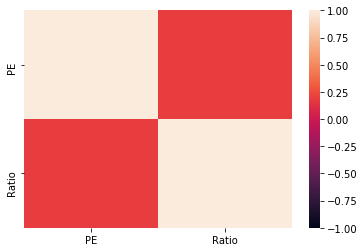

In [157]:
sns.heatmap(ratio_and_pe_correlation, vmin = -1, vmax = 1)

The chart above shows a slight positive correlation between the SP500/GDP pct change ratio to the SP500 Ratio pct change

In [158]:
# Concat the SP500 and GDP data together 
sp500_and_gdp_pct_change = pd.concat([sp500,gdp], axis = 'columns', join = 'inner')#.reset_index()
sp500_and_gdp_pct_change = sp500_and_gdp_pct_change.pct_change().dropna()
sp500_and_gdp_pct_change_cumulative = (1+sp500_and_gdp_pct_change).cumprod()
sp500_and_gdp_pct_change_cumulative.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [159]:
# Concat the Real GDP and SP500 together like the GDP data
sp500_and_real_gdp_pct_change = pd.concat([sp500,real_gdp], axis = 'columns', join = 'inner').reset_index()
sp500_and_real_gdp_pct_change.head()
sp500_and_real_gdp_pct_change = sp500_and_gdp_pct_change.pct_change()
#sp500_and_real_gdp_pct_change = pd.DataFrame(sp500_and_real_gdp_pct_change)
#sp500_and_real_gdp_pct_change.head()

In [160]:
sp500_and_gdp = pd.DataFrame(sp500_and_gdp)